In [212]:
import pandas as pd
import numpy as np
from datetime import datetime
from template import pca_function
import matplotlib.pyplot as plt
import statsmodels.api as sma
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [316]:
df=pd.read_csv("2021-12.csv")

In [317]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/1959,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0733,23.4027,22.2858,31.5688,...,17.791,11.326,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
df.shape

(1512, 128)

In [319]:
df=df.dropna(how='all')
df = df.drop(labels=1, axis=0)
df=df.reset_index()
df=df.drop(['index'], axis=1)

In [320]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,01/01/1959,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0733,23.4027,22.2858,31.5688,...,17.791,11.326,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1,02/01/1959,2451.778,2301.5,17.452,294424.7425,18369.56308,22.5056,23.7185,22.4788,31.8004,...,17.798,11.343,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
2,03/01/1959,2467.594,2318.5,17.617,293418.6704,18523.05762,22.8298,23.8621,22.5892,31.8004,...,17.785,11.363,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
3,04/01/1959,2483.671,2334.9,17.553,299322.8039,18534.46600,23.3161,24.2067,22.9201,32.3021,...,17.796,11.403,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
4,05/01/1959,2498.026,2350.4,17.765,301364.3249,18679.66354,23.6673,24.4077,23.1408,32.4565,...,17.777,11.421,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [321]:
df.shape

(755, 128)

In [323]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,01/01/1959,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0733,23.4027,22.2858,31.5688,...,17.791,11.326,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1,02/01/1959,2451.778,2301.5,17.452,294424.7425,18369.56308,22.5056,23.7185,22.4788,31.8004,...,17.798,11.343,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
2,03/01/1959,2467.594,2318.5,17.617,293418.6704,18523.05762,22.8298,23.8621,22.5892,31.8004,...,17.785,11.363,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
3,04/01/1959,2483.671,2334.9,17.553,299322.8039,18534.46600,23.3161,24.2067,22.9201,32.3021,...,17.796,11.403,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
4,05/01/1959,2498.026,2350.4,17.765,301364.3249,18679.66354,23.6673,24.4077,23.1408,32.4565,...,17.777,11.421,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [325]:
df['sasdate'] = pd.to_datetime(df['sasdate'])
df.index = df['sasdate']
df = df.drop(['sasdate'], axis=1)

In [326]:
df.shape

(755, 127)

In [327]:
df = df[df.index <= '2019-12-31']

In [328]:
df.shape

(732, 127)

In [329]:
df1=pd.read_csv('fred_md_desc.csv')

In [330]:
df1.head()

,Unnamed: 0,id,tcode,ttype,fred,description,gsi,gsi:description,group,edited,varname,group number
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,5.0,First difference of natural log: ln(x)-ln(x-1),RPI,Real Personal Income,M_14386177,PI,Output and Income,False,X1,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,2.0,5.0,First difference of natural log: ln(x)-ln(x-1),W875RX1,Real personal income ex transfer receipts,M_145256755,PI less transfers,Output and Income,False,X2,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
df1=df1.dropna(how='all')
df1=df1.reset_index().drop(['index'], axis=1)

In [332]:
df1.shape

(135, 12)

In [333]:
matching_values = [x for x in df1['fred'] if x in df.columns]

df1 = df1[df1['fred'].isin(matching_values)]

In [335]:
df1 = df1.reset_index().drop(['index'], axis=1)

In [336]:
df1.head()

,Unnamed: 0,id,tcode,ttype,fred,description,gsi,gsi:description,group,edited,varname,group number
0,1.0,1.0,5.0,First difference of natural log: ln(x)-ln(x-1),RPI,Real Personal Income,M_14386177,PI,Output and Income,False,X1,1.0
1,2.0,2.0,5.0,First difference of natural log: ln(x)-ln(x-1),W875RX1,Real personal income ex transfer receipts,M_145256755,PI less transfers,Output and Income,False,X2,1.0
2,6.0,6.0,5.0,First difference of natural log: ln(x)-ln(x-1),INDPRO,IP Index,M_116460980,IP: total,Output and Income,False,X6,1.0
3,7.0,7.0,5.0,First difference of natural log: ln(x)-ln(x-1),IPFPNSS,IP: Final Products and Nonindustrial Supplies,M_116460981,IP: products,Output and Income,False,X7,1.0
4,8.0,8.0,5.0,First difference of natural log: ln(x)-ln(x-1),IPFINAL,IP: Final Products (Market Group),M_116461268,IP: nal prod,Output and Income,False,X8,1.0


In [338]:
df2 = df.copy()

In [339]:
for i in range(0,len(df1)):
    if df1['tcode'][i]==1:
        s=df1['fred'][i]
        srs=df[s]    
        df2.loc[:,s]=srs
    elif df1['tcode'][i]==2:
        s=df1['fred'][i]
        srs=df[s]    
        df2.loc[:,s]=srs.diff()
    elif df1['tcode'][i]==3:
        s=df1['fred'][i]
        srs=df[s]    
        df2.loc[:,s]=srs.diff().diff()
    elif df1['tcode'][i]==4:
        s=df1['fred'][i]
        srs=df[s]    
        df2.loc[:,s]=np.log(srs)
    elif df1['tcode'][i]==5:
        s=df1['fred'][i]
        srs=df[s]    
        df2.loc[:,s]=np.log(srs).diff()
    elif df1['tcode'][i]==6:
        s=df1['fred'][i]
        srs=df[s]    
        df2.loc[:,s]=np.log(srs).diff().diff()
    elif df1['tcode'][i]==7:
        s=df1['fred'][i]
        srs=df[s]    
        df2.loc[:,s]=((srs/srs.shift(1)) - 1)
        
    

In [341]:
df2.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-02-01,0.003931,0.003613,0.010368,0.007358,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-03-01,0.006430,0.007359,0.009410,-0.003423,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,...,-0.001124,0.000262,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1959-04-01,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,...,0.001349,0.001752,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
1959-05-01,0.005763,0.006616,0.012005,0.006797,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,...,-0.001687,-0.001937,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN


### Question 6

In [342]:

df3 = df2-df2.mean()   
df3 = df3/df3.std()
df3 = df3.fillna(0)



In [343]:
df3.to_csv('transformed_data.csv')

In [344]:
df3.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1959-02-01,0.235356,0.202924,1.486951,0.466965,0.230325,2.165845,1.571862,0.826021,0.655097,0.129078,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1959-03-01,0.691714,0.870822,1.302432,-0.513603,0.316079,1.528495,0.556982,0.356831,-0.179705,0.754486,...,-0.186681,0.163186,-0.005237,-0.897660,1.018206,0.0,0.203052,0.205175,-1.371325,0.0
1959-04-01,0.703404,0.815432,-1.212412,1.609793,-0.337283,2.376336,1.700529,1.571879,1.608013,0.179709,...,0.223277,1.100873,-0.005186,1.344112,-1.031855,0.0,0.500336,0.333977,2.307611,0.0
1959-05-01,0.569895,0.738387,1.802578,0.416001,0.272174,1.609552,0.864581,0.946996,0.364888,0.787787,...,-0.279920,-1.219872,-0.005136,-0.450747,-1.017022,0.0,0.116367,0.100082,-1.422253,0.0


In [345]:
factor = pca_function(df3)

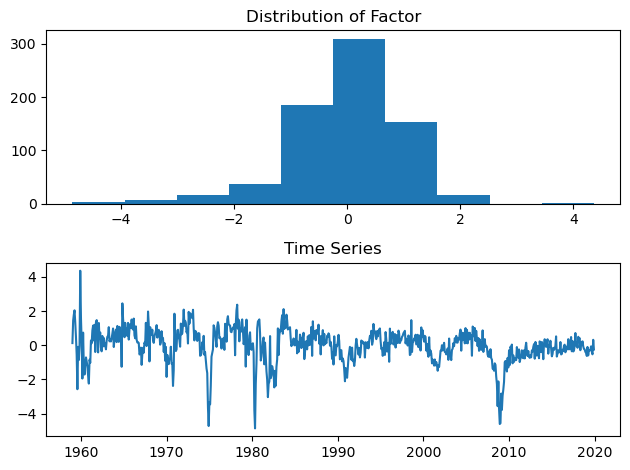

In [346]:
figure, axis = plt.subplots(2, 1)
  
axis[0].hist(factor['comp_0'])
axis[0].set_title("Distribution of Factor")
  
axis[1].plot(factor['comp_0'])
axis[1].set_title("Time Series")

figure.tight_layout()

figure.savefig("factor.pdf", bbox_inches='tight')

In [347]:
df2.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-02-01,0.003931,0.003613,0.010368,0.007358,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-03-01,0.006430,0.007359,0.009410,-0.003423,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,...,-0.001124,0.000262,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1959-04-01,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,...,0.001349,0.001752,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
1959-05-01,0.005763,0.006616,0.012005,0.006797,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,...,-0.001687,-0.001937,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN


In [348]:
df4 = df2.shift(1)

In [349]:
df4.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-03-01,0.003931,0.003613,0.010368,0.007358,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-04-01,0.006430,0.007359,0.009410,-0.003423,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,...,-0.001124,0.000262,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1959-05-01,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,...,0.001349,0.001752,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN


In [350]:
x = factor.shift(1).fillna(0)

#### 'INDPRO'

In [351]:
y = df4['INDPRO'].fillna(0)
model1 = sma.OLS(y,x).fit()
indpro=model1.fittedvalues

### S&P 500

In [352]:

y = df4['S&P 500'].fillna(0)
model2 = sma.OLS(y,x).fit()
SP=model2.fittedvalues

### PAYEMS

In [353]:
y = df4['PAYEMS'].fillna(0)
model3 = sma.OLS(y,x).fit()
paymes=model3.fittedvalues

### CPIAUCSL

In [354]:
y = df4['CPIAUCSL'].fillna(0)
model4 = sma.OLS(y,x).fit()
cpiaucsl=model4.fittedvalues

### BUSINVx

In [355]:
y = df4['BUSINVx'].fillna(0)
model5 = sma.OLS(y,x).fit()
businvx=model5.fittedvalues

In [372]:
data={'INDPRO_fitted':indpro,'S&P 500_fitted':SP,'PAYEMS_fitted':paymes,'CPIAUCSL_fitted':cpiaucsl,'BUSINVx_fitted':businvx}
df5 = pd.DataFrame(data)  

In [373]:
df5.head()

,INDPRO_fitted,S&P 500_fitted,PAYEMS_fitted,CPIAUCSL_fitted,BUSINVx_fitted
sasdate,,,,,
1959-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
1959-02-01,0.000838,0.000175,0.000238,0.000014,0.000192
1959-03-01,0.009357,0.001957,0.002658,0.000156,0.002145
1959-04-01,0.011548,0.002416,0.003281,0.000193,0.002648
1959-05-01,0.013246,0.002771,0.003763,0.000221,0.003037


In [374]:
df5.to_csv('fitted_values.csv')

## Q 12

In [376]:
df_nber = pd.read_csv('NBER_DATES.csv')

In [431]:
df_nber.head()

,Unnamed: 0,0
Unnamed: 0,,
1857-06-01,1857-06,Recession
1857-07-01,1857-07,Recession
1857-08-01,1857-08,Recession
1857-09-01,1857-09,Recession
1857-10-01,1857-10,Recession


In [385]:
df_nber.index = pd.to_datetime(df_nber['Unnamed: 0'])

In [380]:
df_transformed_fitted = pd.concat([df3[['INDPRO','S&P 500', 'PAYEMS', 'CPIAUCSL', 'BUSINVx']], df5], axis=1)

In [390]:
df_transformed_fitted = df_transformed_fitted.merge(df_nber['0'], left_index=True, right_index=True)

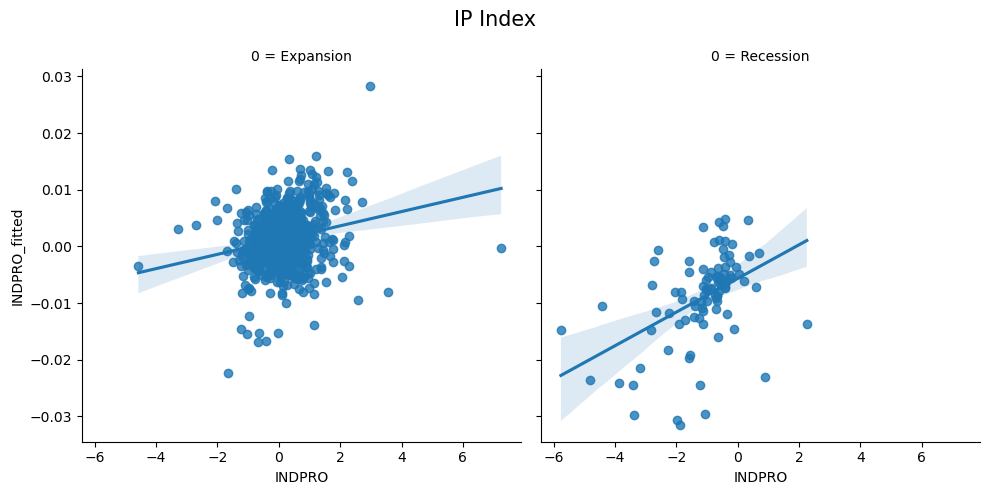

In [425]:
plot = sns.lmplot(x='INDPRO', y='INDPRO_fitted',col='0', data=df_transformed_fitted)
plot.fig.suptitle(df1[df1['fred'] == 'INDPRO']['description'].to_list()[0], fontsize=15)
fig = plot.figure
fig.tight_layout()
fig.savefig('INDPRO.pdf')

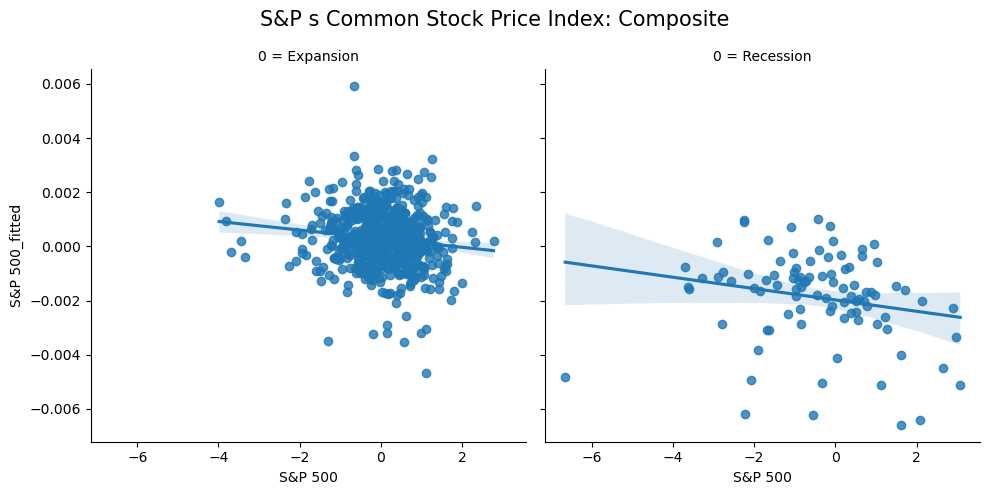

In [427]:
plot = sns.lmplot(x='S&P 500', y='S&P 500_fitted',col='0', data=df_transformed_fitted)
plot.fig.suptitle(df1[df1['fred'] == 'S&P 500']['description'].to_list()[0], fontsize=15)
fig = plot.figure
fig.tight_layout()
fig.savefig('S&P 500.pdf')

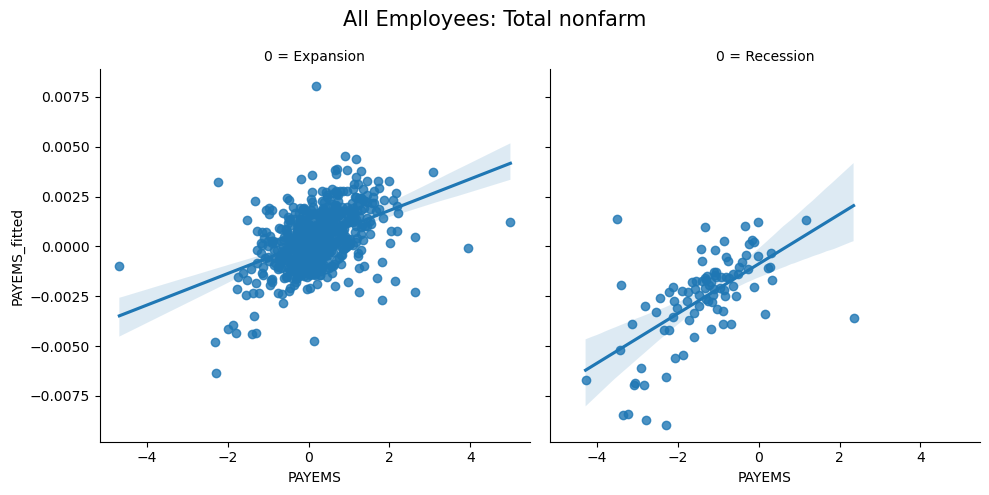

In [428]:
plot = sns.lmplot(x='PAYEMS', y='PAYEMS_fitted',col='0', data=df_transformed_fitted)
plot.fig.suptitle(df1[df1['fred'] == 'PAYEMS']['description'].to_list()[0], fontsize=15)
fig = plot.figure
fig.tight_layout()
fig.savefig('PAYEMS.pdf')

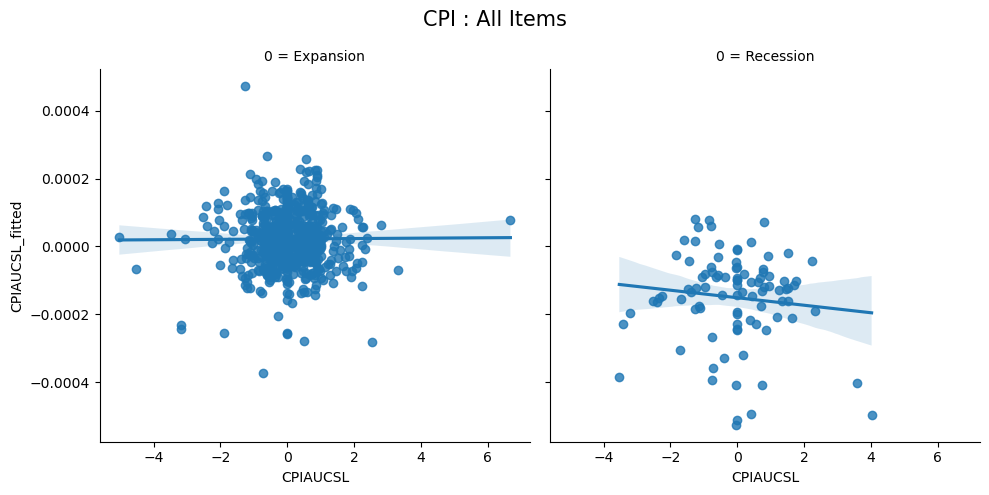

In [429]:
plot = sns.lmplot(x='CPIAUCSL', y='CPIAUCSL_fitted',col='0', data=df_transformed_fitted)
plot.fig.suptitle(df1[df1['fred'] == 'CPIAUCSL']['description'].to_list()[0], fontsize=15)
fig = plot.figure
fig.tight_layout()
fig.savefig('CPIAUCSL.pdf')

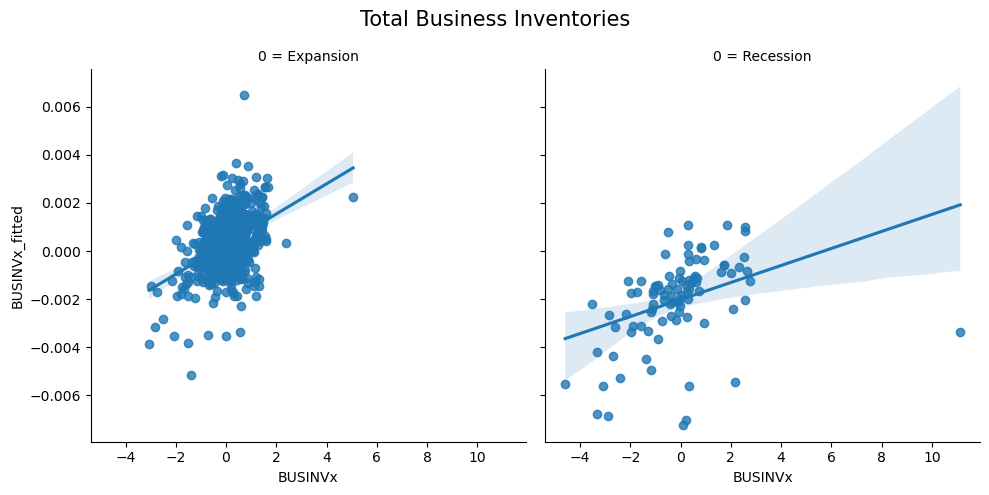

In [430]:
plot = sns.lmplot(x='BUSINVx', y='BUSINVx_fitted',col='0', data=df_transformed_fitted)
plot.fig.suptitle(df1[df1['fred'] == 'BUSINVx']['description'].to_list()[0], fontsize=15)
fig = plot.figure
fig.tight_layout()
fig.savefig('BUSINVx.pdf')